In [8]:
import json

In [16]:
import os, fnmatch

def find(pattern, path): # match a pattern
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                print(f'{name}\t{root}')                
                result.append(os.path.join(root, name))
    return result 

path = r'\\che-ds\CS_IgSor\GIT_syno'   
res = find('*.csv', path ) 

adult.csv	\\che-ds\CS_IgSor\GIT_syno\data
keywords.csv	\\che-ds\CS_IgSor\GIT_syno\data
power.csv	\\che-ds\CS_IgSor\GIT_syno\data
sales_db.csv	\\che-ds\CS_IgSor\GIT_syno\data
tags.csv	\\che-ds\CS_IgSor\GIT_syno\data
transactions.csv	\\che-ds\CS_IgSor\GIT_syno\data
visit_log.csv	\\che-ds\CS_IgSor\GIT_syno\data
sample_submission.csv	\\che-ds\CS_IgSor\GIT_syno\data\journey-springfield
links.csv	\\che-ds\CS_IgSor\GIT_syno\data\ml-latest-small
movies.csv	\\che-ds\CS_IgSor\GIT_syno\data\ml-latest-small
ratings.csv	\\che-ds\CS_IgSor\GIT_syno\data\ml-latest-small
tags.csv	\\che-ds\CS_IgSor\GIT_syno\data\ml-latest-small
funnel.csv	\\che-ds\CS_IgSor\GIT_syno\ipynb
data_for_test.csv	\\che-ds\CS_IgSor\GIT_syno\Welltory


In [13]:
%%time
purchase = {}
with open(r'\\che-ds\CS_IgSor\GIT_syno\data\purchase_log.txt') as p:
    for line in p:

      c_user = json.loads(line.strip())['user_id']
      c_cat = json.loads(line.strip())["category"]
      
      if c_user in purchase:
        
        purchase[c_user] +=  "/" + c_cat

      else:
        purchase[c_user] = c_cat
      
p.close()

len(purchase)

CPU times: total: 984 ms
Wall time: 1.01 s


99518

In [ ]:
# purchase

In [12]:
%%time
with open(r'\\che-ds\CS_IgSor\GIT_syno\data\visit_log.csv', encoding='cp1251') as v:
  counter = 0
  with open('funnel.csv', 'w', encoding='cp1251') as f:
 
    for line in v:
      # выбираем [0] первый элемент списка (из строки файла, разделенной по сепаратору ',')
      c_user = line.strip().split(',')[0]
      # если user_id   есть в словаре покупок
      if c_user in purchase:

        #    строка без'\n'   +   значение из словаря 
        f.write(line.strip()+','+ purchase[c_user] +'\n' )
        counter += 1
        
        # для контроля вывода мульти категории
        if counter == 341:  
          print(f'Контроль вывода мульти категории:  {line.strip()+","+ purchase[c_user]}\n' )


v.close()    
f.close()

print(f'В файл {f.name} добавлено {counter} строк.\n')

Контроль вывода мульти категории:  c9d93ee37c,context,РџСЂРѕРґСѓРєС‚С‹/Р­Р»РµРєС‚СЂРѕРЅРёРєР°

В файл funnel.csv добавлено 13799 строк.

CPU times: total: 156 ms
Wall time: 308 ms


# https://jakevdp.github.io/blog/2017/11/09/exploring-line-lengths-in-python-packages/

In [5]:
import os
import numpy
numpy.__path__

def iter_lines(module):
    """Iterate over all lines of Python in module"""
    for root, dirs, files in os.walk(module.__path__[0]):
        for filename in files:
            if filename.endswith('.py'):
                with open(os.path.join(root, filename)) as f:
                    yield from f

In [6]:
lines = iter_lines(numpy)
len(list(lines))

232019

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

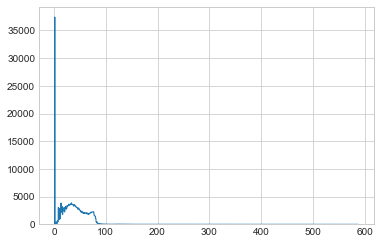

In [8]:
lengths = [len(line) for line in iter_lines(numpy)]
plt.hist(lengths, bins=np.arange(max(lengths)), histtype='step', linewidth=1);

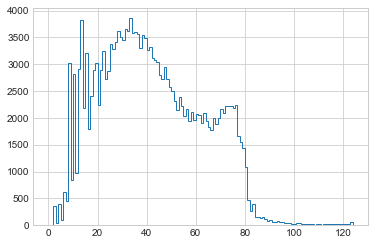

In [9]:
lengths = [len(line) for line in iter_lines(numpy) if len(line) > 1]
plt.hist(lengths, bins=np.arange(125), histtype='step', linewidth=1);

In [10]:
np.argmax(np.bincount(lengths))

33